Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")


Importing the dataset.
Since data is in the form of excel file we have to use pd.read_excel to load the data.

In [3]:

df=pd.read_excel("day.xlsx")

In [4]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2018-01-01 00:00:00,1.0,0.0,1.0,0.0,1.0,1.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,2018-02-01 00:00:00,1.0,0.0,1.0,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3.0,2018-03-01 00:00:00,1.0,0.0,1.0,0.0,3.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4.0,2018-04-01 00:00:00,1.0,0.0,1.0,0.0,4.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5.0,2018-05-01 00:00:00,1.0,0.0,1.0,0.0,5.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726.0,27-12-2019,1.0,1.0,12.0,0.0,5.0,1.0,2.0,10.420847,11.33210,65.2917,23.458911,247.0,1867.0,2114.0
726,727.0,28-12-2019,1.0,1.0,12.0,0.0,6.0,0.0,2.0,10.386653,12.75230,59.0000,10.416557,644.0,2451.0,3095.0
727,728.0,29-12-2019,1.0,1.0,12.0,0.0,0.0,0.0,2.0,10.386653,12.12000,75.2917,8.333661,159.0,1182.0,1341.0
728,729.0,30-12-2019,1.0,1.0,12.0,0.0,1.0,1.0,1.0,10.489153,11.58500,48.3333,23.500518,364.0,1432.0,1796.0


In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2018-01-01 00:00:00,1.0,0.0,1.0,0.0,1.0,1.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,2018-02-01 00:00:00,1.0,0.0,1.0,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3.0,2018-03-01 00:00:00,1.0,0.0,1.0,0.0,3.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4.0,2018-04-01 00:00:00,1.0,0.0,1.0,0.0,4.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5.0,2018-05-01 00:00:00,1.0,0.0,1.0,0.0,5.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


Exploratory Data Analysis (EDA)

In [6]:
# Checking the dimension of dataset 
df.shape

(730, 16)

In [7]:
# Checking the type of dataset
df.dtypes

instant       float64
dteday         object
season        float64
yr            float64
mnth          float64
holiday       float64
weekday       float64
workingday    float64
weathersit    float64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
#checking null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
df['cnt'].unique()

array([ 985.,  801., 1349., 1562., 1600., 1606., 1510.,  959.,  822.,
       1321., 1263., 1162., 1406., 1421., 1248., 1204., 1000.,  683.,
       1650., 1927., 1543.,  981.,  986., 1416., 1985.,  506.,  431.,
       1167., 1098., 1096., 1501., 1360., 1526., 1550., 1708., 1005.,
       1623., 1712., 1530., 1605., 1538., 1746., 1472., 1589., 1913.,
       1815., 2115., 2475., 2927., 1635., 1812., 1107., 1450., 1917.,
       1807., 1461., 1969., 2402., 1446., 1851., 2134., 1685., 1944.,
       2077.,  605., 1872., 2133., 1891.,  623., 1977., 2132., 2417.,
       2046., 2056., 2192., 2744., 3239., 3117., 2471., 2703., 2121.,
       1865., 2210., 2496., 1693., 2028., 2425., 1536., 2227., 2252.,
       3249., 3115., 1795., 2808., 3141., 1471., 2455., 2895., 3348.,
       2034., 2162., 3267., 3126.,  795., 3744., 3429., 3204., 3944.,
       4189., 1683., 4036., 4191., 4073., 4400., 3872., 4058., 4595.,
       5312., 3351., 4401., 4451., 2633., 4433., 4608., 4714., 4333.,
       4362., 4803.,

In [12]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    float64
 1   dteday      730 non-null    object 
 2   season      730 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     730 non-null    float64
 6   weekday     730 non-null    float64
 7   workingday  730 non-null    float64
 8   weathersit  730 non-null    float64
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    float64
 14  registered  730 non-null    float64
 15  cnt         730 non-null    float64
dtypes: float64(15), object(1)
memory usage: 91.4+ KB


In [13]:
#renaming columns
df=df.rename(columns={"weathersit":"weather",
                      "yr":"year",
                      "mnth":"month",
                      "hum":"humidity",
                      "cnt":"count"})
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1.0,2018-01-01 00:00:00,1.0,0.0,1.0,0.0,1.0,1.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,2018-02-01 00:00:00,1.0,0.0,1.0,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3.0,2018-03-01 00:00:00,1.0,0.0,1.0,0.0,3.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4.0,2018-04-01 00:00:00,1.0,0.0,1.0,0.0,4.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5.0,2018-05-01 00:00:00,1.0,0.0,1.0,0.0,5.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [14]:
#summary of dataset
df.describe()

,instant,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Feature Engineering
#The columns depday showing object data type which means python is not able to understand the type of data in this column.
#Therefore, we have to convert this datatype into datetime to use them properly for prediction.

In [15]:
# Converting Dteday columns from object type to Datetime Type
df['dteday']=df['dteday'].astype('datetime64[ns]')

In [16]:
df.dtypes

instant              float64
dteday        datetime64[ns]
season               float64
year                 float64
month                float64
holiday              float64
weekday              float64
workingday           float64
weather              float64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual               float64
registered           float64
count                float64
dtype: object

In [17]:
# Extracting year from dteday column
df['dteday'].dt.year

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
725    2019
726    2019
727    2019
728    2019
729    2019
Name: dteday, Length: 730, dtype: int64

In [18]:
# Extracting month from dteday column
df['dteday'].dt.month

0       1
1       2
2       3
3       4
4       5
       ..
725    12
726    12
727    12
728    12
729    12
Name: dteday, Length: 730, dtype: int64

In [19]:
# Extracting Day from dteday column
df['dteday'].dt.day

0       1
1       1
2       1
3       1
4       1
       ..
725    27
726    28
727    29
728    30
729    31
Name: dteday, Length: 730, dtype: int64

In [20]:
df['year']=df['dteday'].dt.year


In [21]:
df['month']=df['dteday'].dt.month


In [22]:
df['day']=df['dteday'].dt.day

Now we have converted dteday column into integers data type, we can drop this column as it is of no use.
# Dropping dteday column

In [23]:
df.drop(['dteday'],axis=1,inplace=True)
df.head()

,instant,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,1.0,1.0,2018,1,0.0,1.0,1.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0,1
1,2.0,1.0,2018,2,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0,1
2,3.0,1.0,2018,3,0.0,3.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0,1
3,4.0,1.0,2018,4,0.0,4.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0,1
4,5.0,1.0,2018,5,0.0,5.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0,1


Data Visualization.
Univariate Analysis

<AxesSubplot:xlabel='count', ylabel='Density'>

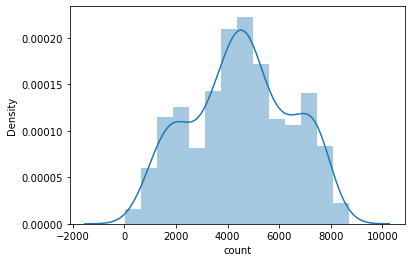

In [24]:
sns.distplot(df['count'])

<AxesSubplot:xlabel='season', ylabel='Density'>

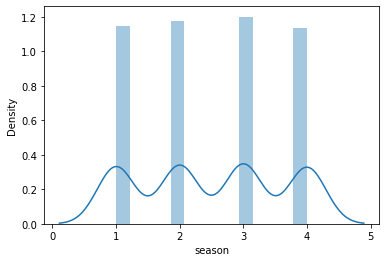

In [25]:
sns.distplot(df['season'])

<AxesSubplot:xlabel='month', ylabel='Density'>

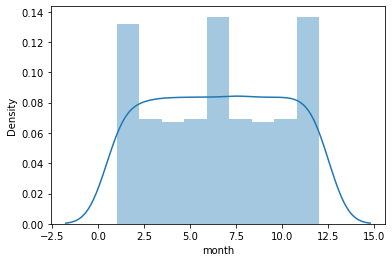

In [26]:
sns.distplot(df['month'])

<AxesSubplot:xlabel='holiday', ylabel='Density'>

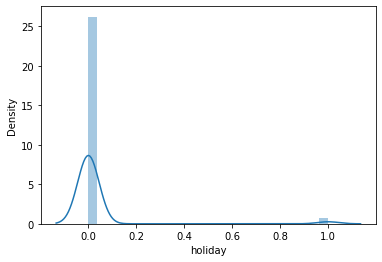

In [27]:
sns.distplot(df['holiday'])

<AxesSubplot:xlabel='weekday', ylabel='Density'>

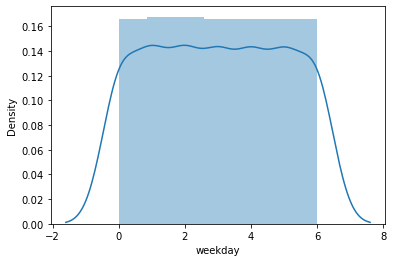

In [28]:
sns.distplot(df['weekday'])

<AxesSubplot:xlabel='workingday', ylabel='Density'>

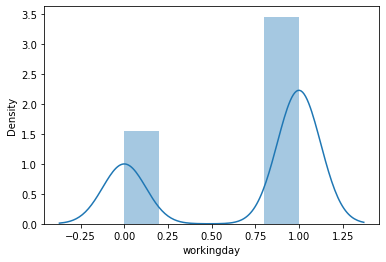

In [29]:
sns.distplot(df['workingday'])

<AxesSubplot:xlabel='weather', ylabel='Density'>

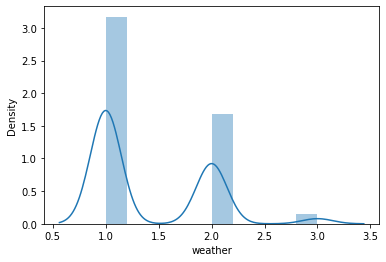

In [30]:
sns.distplot(df['weather'])

<AxesSubplot:xlabel='temp', ylabel='Density'>

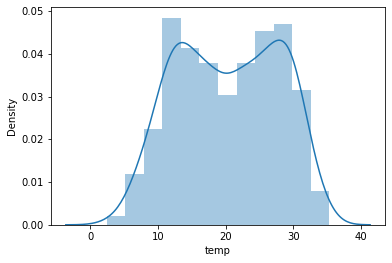

In [31]:
sns.distplot(df['temp'])

<AxesSubplot:xlabel='atemp', ylabel='Density'>

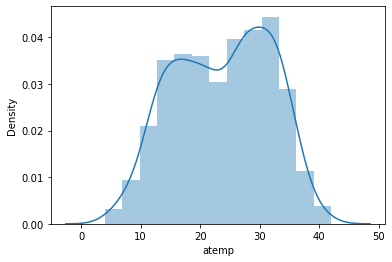

In [32]:
sns.distplot(df['atemp'])

<AxesSubplot:xlabel='humidity', ylabel='Density'>

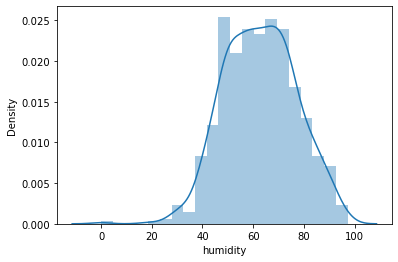

In [33]:
sns.distplot(df['humidity'])

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

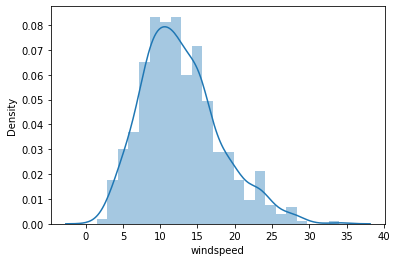

In [34]:
sns.distplot(df['windspeed'])

<AxesSubplot:xlabel='casual', ylabel='Density'>

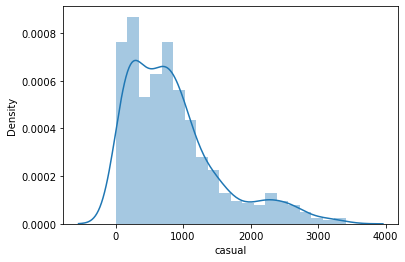

In [35]:
sns.distplot(df['casual'])

<AxesSubplot:xlabel='registered', ylabel='Density'>

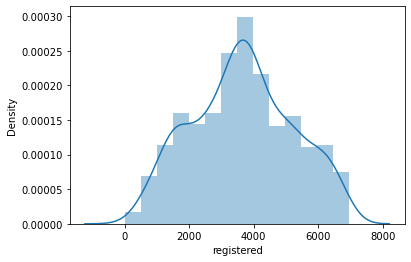

In [36]:
sns.distplot(df['registered'])

From the distribution plot we can observe the data is not normally distributed in some columns and some columns are almost normal but have no proper bell shape curve. The workingday,weather,windspeed and casual columns are skewed to right as the mean is more than the median in htose columns.

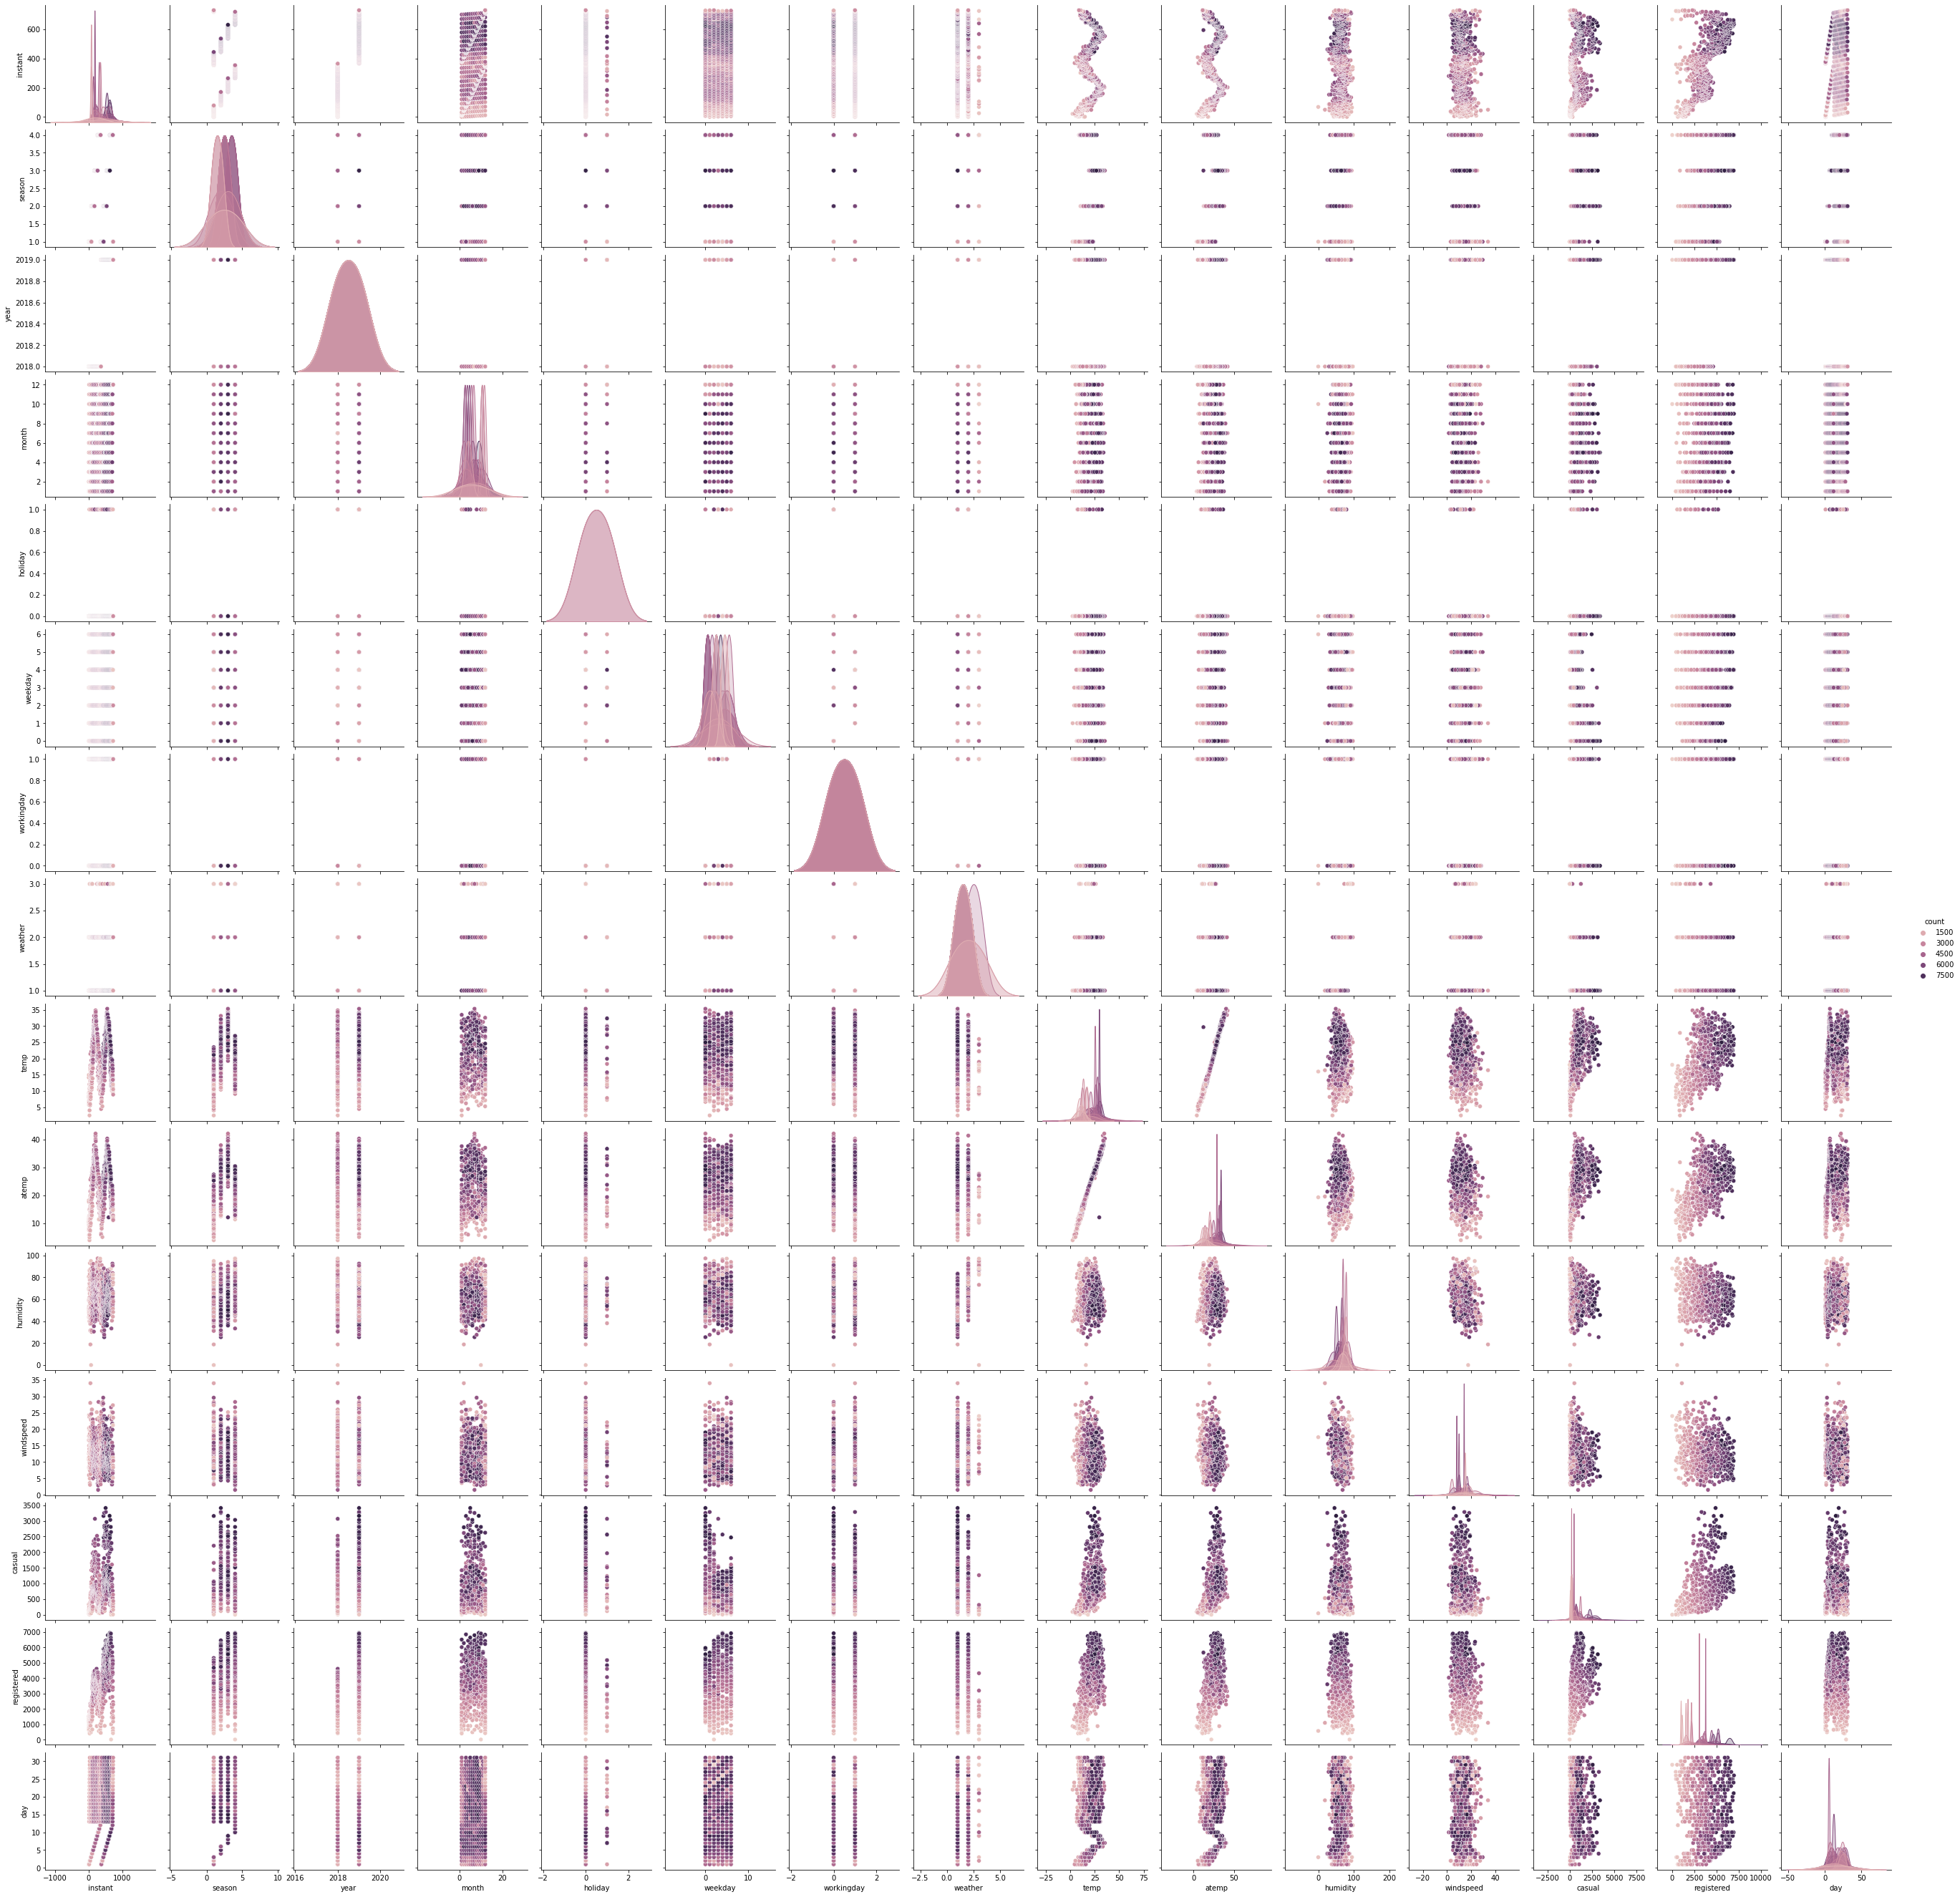

In [37]:
sns.pairplot(df,hue="count")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "count". Here we can observe the relation between the features and label.
Here we can observe the correaltion between the features and on the diagonal we cna notice hte distribution plot which shows whether the column has skewness or not.
We can notice the linear relation between the features.

Correlation between the target variable and independent variables using HEAT map

In [38]:
cor = df.corr()
cor

,instant,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
instant,1.000000,4.135867e-01,8.660262e-01,3.078886e-01,0.016275,-0.001182,-0.015171,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896,1.221813e-01
season,0.413587,1.000000e+00,6.039005e-13,4.442600e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584,1.535284e-01
year,0.866026,6.039005e-13,1.000000e+00,5.159254e-13,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728,2.019169e-13
month,0.307889,4.442600e-01,5.159254e-13,1.000000e+00,-0.019126,0.009854,0.016227,0.006936,0.076497,0.077715,0.082547,-0.082251,0.031199,0.132373,0.117710,1.189318e-02
holiday,0.016275,-1.086804e-02,8.195345e-03,-1.912625e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764,4.535910e-03
weekday,-0.001182,4.012478e-03,6.852851e-04,9.853998e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,-0.350848,0.199326,0.036183,7.916584e-04
workingday,-0.015171,1.786841e-02,-1.185197e-02,1.622686e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640,-2.410535e-03
weather,-0.021862,2.130636e-02,-5.032247e-02,6.935773e-03,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929,-1.101783e-02
temp,0.150738,3.333607e-01,4.878919e-02,7.649702e-02,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,8.189816e-02
atemp,0.152773,3.420139e-01,4.721519e-02,7.771523e-02,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,7.821203e-02


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

<AxesSubplot:>

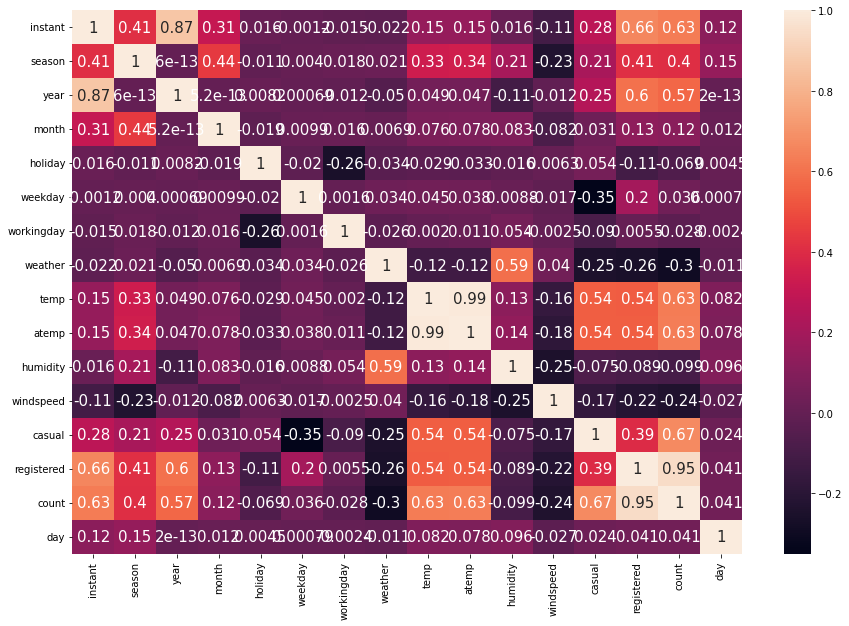

In [39]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,annot_kws={'size':15})

Identifying the outliers


<AxesSubplot:>

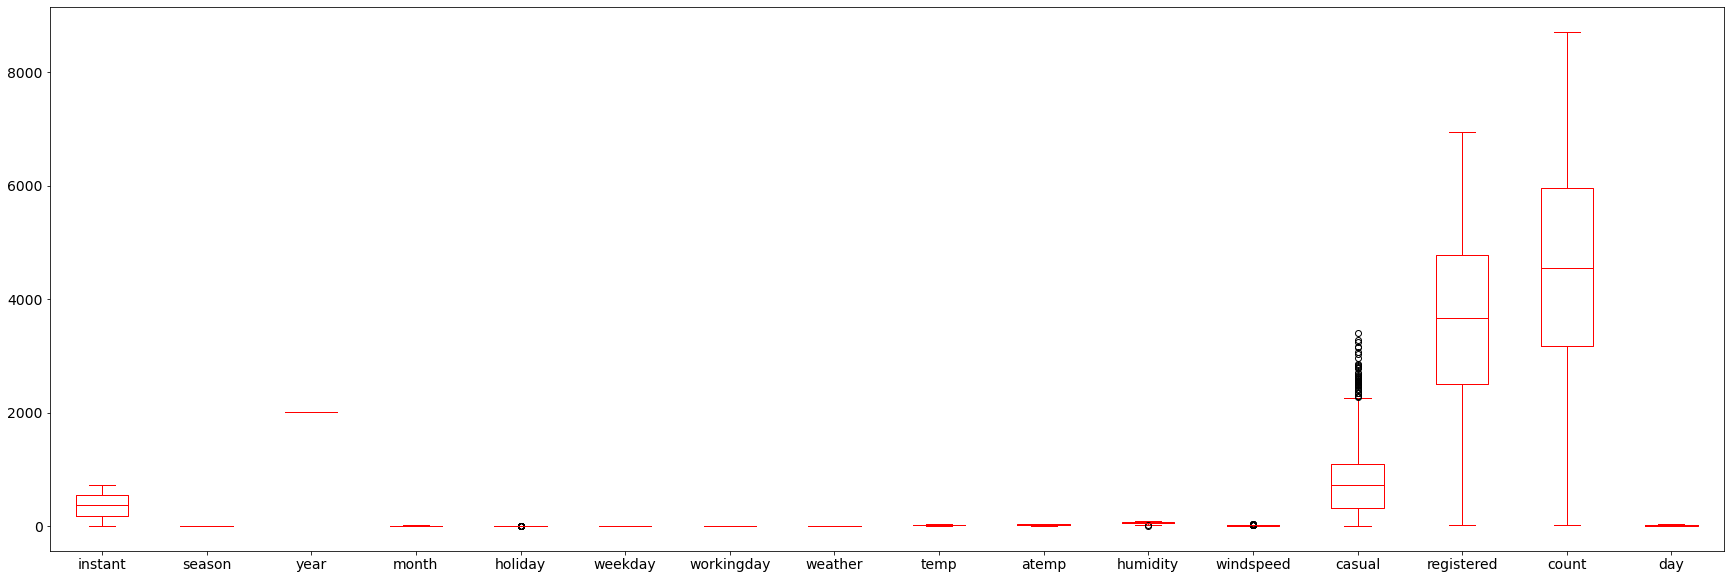

In [40]:
# Identifying the outliers using boxplot
df.plot(kind='box',fontsize=14,figsize=(30,10),color='r')

The outliers present in holiday,humidity,windspeed,casual.
we can remove outliers in these columns using either Zscore method or IQR method.

In [41]:
df.shape

(730, 16)

Removing outliers
1.Zscore method

In [42]:
z=np.abs(zscore(df))
threshold = 3
np.where(z>3)
z

,instant,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,1.729680,1.350819,1.0,1.602745,0.172102,0.998460,0.669636,1.112127,0.827613,0.680818,1.252343,0.387833,0.755455,1.927745,1.820972,1.673503
1,1.724934,1.350819,1.0,1.312710,0.172102,0.498202,0.669636,1.112127,0.722069,0.741507,0.480996,0.748899,1.046996,1.917480,1.916078,1.673503
2,1.720189,1.350819,1.0,1.022674,0.172102,0.002056,0.669636,0.724644,1.635432,1.750344,1.338073,0.745931,1.063031,1.558846,1.632827,1.673503
3,1.715444,1.350819,1.0,0.732638,0.172102,0.502314,0.669636,0.724644,1.615560,1.610886,0.261577,0.389769,1.080523,1.414494,1.522732,1.673503
4,1.710698,1.350819,1.0,0.442602,0.172102,1.002572,0.669636,0.724644,1.468226,1.505615,1.340294,0.046477,1.118424,1.373434,1.503090,1.673503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1.710698,1.350819,1.0,1.587648,0.172102,1.002572,0.669636,1.112127,1.319509,1.521749,0.177576,2.059845,0.877902,1.149528,1.237414,1.282303
726,1.715444,1.350819,1.0,1.587648,0.172102,1.502830,1.493348,1.112127,1.324068,1.347378,0.264634,0.452029,0.299193,0.774854,0.730355,1.395988
727,1.720189,1.350819,1.0,1.587648,0.172102,1.498718,1.493348,1.112127,1.324068,1.425011,0.880424,0.853182,1.006180,1.588999,1.636962,1.509672
728,1.724934,1.350819,1.0,1.587648,0.172102,0.998460,0.669636,0.724644,1.310404,1.490698,1.014341,2.067858,0.707351,1.428608,1.401782,1.623357


In [43]:
new_df = df[(z<3).all(axis=1)]
new_df

,instant,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,1.0,1.0,2018,1,0.0,1.0,1.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0,1
1,2.0,1.0,2018,2,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0,1
2,3.0,1.0,2018,3,0.0,3.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0,1
3,4.0,1.0,2018,4,0.0,4.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0,1
4,5.0,1.0,2018,5,0.0,5.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726.0,1.0,2019,12,0.0,5.0,1.0,2.0,10.420847,11.33210,65.2917,23.458911,247.0,1867.0,2114.0,27
726,727.0,1.0,2019,12,0.0,6.0,0.0,2.0,10.386653,12.75230,59.0000,10.416557,644.0,2451.0,3095.0,28
727,728.0,1.0,2019,12,0.0,0.0,0.0,2.0,10.386653,12.12000,75.2917,8.333661,159.0,1182.0,1341.0,29
728,729.0,1.0,2019,12,0.0,1.0,1.0,1.0,10.489153,11.58500,48.3333,23.500518,364.0,1432.0,1796.0,30


In [44]:
# Shape of original dataset
df.shape


(730, 16)

In [45]:
# Shape of new dataframe after removing outliers
new_df.shape

(699, 16)

In [46]:
31/730

0.04246575342465753

Here we are losing very less data hence removing outliers.

Checking skewness in the data

In [47]:
#checking skewness
new_df.skew()

instant       0.014363
season       -0.017198
year          0.020073
month        -0.025927
holiday       0.000000
weekday      -0.012792
workingday   -0.964106
weather       0.937950
temp         -0.059739
atemp        -0.134484
humidity      0.077743
windspeed     0.632469
casual        1.144020
registered    0.054186
count        -0.053305
day           0.003393
dtype: float64

In [48]:
df1 = new_df

In [49]:
features = ['workingday','weather','windspeed','casual']

Removing skewness using Power transformation

In [50]:
scaler = PowerTransformer(method='yeo-johnson')

In [51]:
new_df[features] = scaler.fit_transform(df1[features].values)
new_df[features]


,workingday,weather,windspeed,casual
0,0.628657,1.272995,-0.277351,-0.689057
1,0.628657,1.272995,0.830850,-1.407429
2,0.628657,-0.765882,0.828296,-1.464469
3,0.628657,-0.765882,-0.279516,-1.530785
4,0.628657,-0.765882,0.087244,-1.693310
...,...,...,...,...
725,0.628657,1.272995,1.841891,-0.940576
726,-1.590693,1.272995,-0.349816,-0.016290
727,-1.590693,1.272995,-0.836839,-1.275282
728,0.628657,-0.765882,1.847472,-0.601936


# Checking how the data has been distributed after removing the skewness

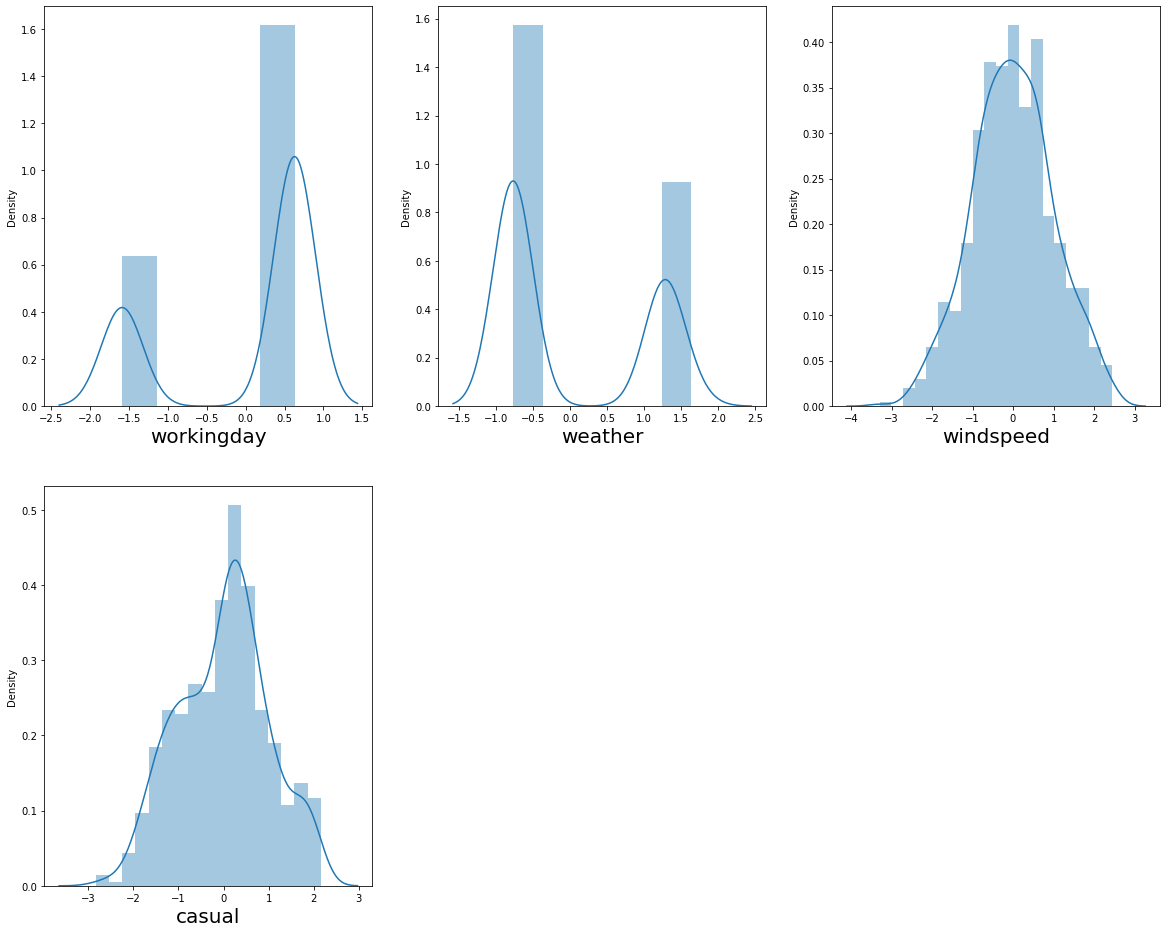

In [52]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()   

Separating the feature and label into x and y

In [53]:
x=new_df.drop("count",axis=1)
y=new_df["count"]

Standard Scalarization

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,instant,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,day
0,-1.722057,-1.364928,-0.990035,-1.609991,0.0,-1.012057,0.628657,1.272995,-0.827932,-0.681903,1.253064,-0.277351,-0.689057,-1.955003,-1.669238
1,-1.717313,-1.364928,-0.990035,-1.319569,0.0,-0.512813,0.628657,1.272995,-0.722592,-0.742506,0.468935,0.830850,-1.407429,-1.944687,-1.669238
2,-1.712570,-1.364928,-0.990035,-1.029148,0.0,-0.013570,0.628657,-0.765882,-1.634185,-1.749898,-1.380277,0.828296,-1.464469,-1.584253,-1.669238
3,-1.707826,-1.364928,-0.990035,-0.738726,0.0,0.485673,0.628657,-0.765882,-1.614351,-1.610640,-0.285943,-0.279516,-1.530785,-1.439176,-1.669238
4,-1.703083,-1.364928,-0.990035,-0.448305,0.0,0.984916,0.628657,-0.765882,-1.467303,-1.505520,-1.382535,0.087244,-1.693310,-1.397910,-1.669238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,1.717096,-1.364928,1.010065,1.584647,0.0,0.984916,0.628657,1.272995,-1.318874,-1.521630,0.160488,1.841891,-0.940576,-1.172881,1.273504
695,1.721840,-1.364928,1.010065,1.584647,0.0,1.484159,-1.590693,1.272995,-1.323424,-1.347509,-0.289051,-0.349816,-0.016290,-0.796328,1.386686
696,1.726584,-1.364928,1.010065,1.584647,0.0,-1.511300,-1.590693,1.272995,-1.323424,-1.425031,0.874982,-0.836839,-1.275282,-1.614558,1.499869
697,1.731327,-1.364928,1.010065,1.584647,0.0,-1.012057,0.628657,-0.765882,-1.309787,-1.490624,-1.051181,1.847472,-0.601936,-1.453362,1.613051


#splitting data into train,test,split.

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=37)

Modeling

Finding the best random state

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [57]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9976636675637497  on Random_state  113


We have got the best random state here.

Feature Importance

,Importance
Features,
registered,0.914
casual,0.076
instant,0.006
weekday,0.001
temp,0.001
atemp,0.001
humidity,0.001
windspeed,0.001
season,0.000


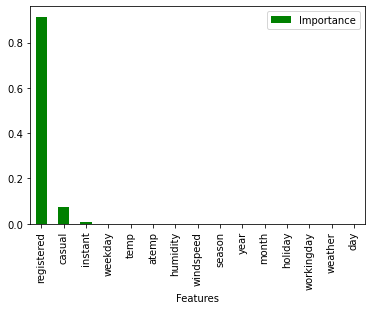

In [58]:
# Lets ckeck the feature importance using Random Forest Regressor
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='g')
importances

With the help of Random Forest Regressor we are able to list down the importance or priority given to a feature as per it's involvement or weightage in predicting our label.

Creating new train test split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

Regression Algorithms

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Random Forest Regressor

R2_Score: 0.9976230484567076
MAE: 66.62604761904763
MSE: 8608.625887142862
RMSE: 92.7826809654844


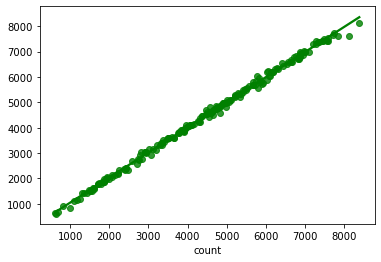

In [61]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="g")
plt.show()

The predicted R2 score using Random Forest Regressor is o.99%

Decision Tree Regressor

GradientBoosting Regressor

R2_Score: 0.9962163840841404
MAE: 81.61509541508549
MSE: 13703.154366856752
RMSE: 117.06047311905395


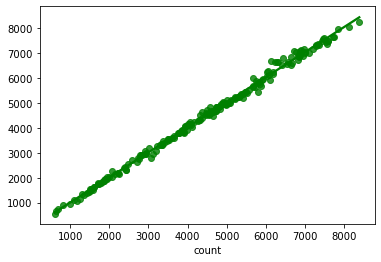

In [62]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="g")
plt.show()

BaggingRegressor

R2_Score: 0.9952741810041253
MAE: 98.25095238095236
MSE: 17115.539380952378
RMSE: 130.82637112200422


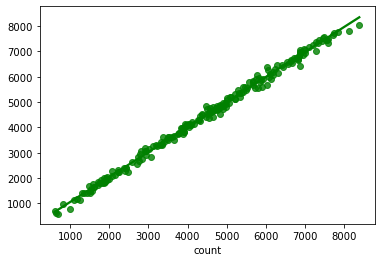

In [63]:
# Checking R2 score for BaggingRegressor

BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predBR))
print('MSE:',metrics.mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predBR)))

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="g")
plt.show()

XGB Regressor

R2_Score: 0.9936034478068719
MAE: 104.5482177734375
MSE: 23166.448198581096
RMSE: 152.2052830836732


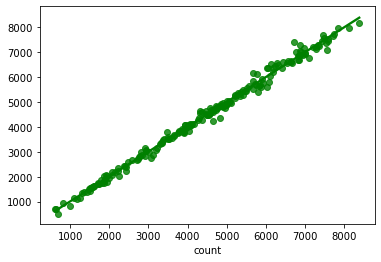

In [64]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb

XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
print('R2_Score:',r2_score(y_test,predXGB))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predXGB))
print('MSE:',metrics.mean_squared_error(y_test, predXGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predXGB)))

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="g")
plt.show()

Checking the cross validation score

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
# Checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.9695764089064264


In [67]:
# Checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.9711585876579392


In [68]:
# Checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.9553524643958304


In [69]:
# Checking cv score for XGBRegressor
print(cross_val_score(XGB,x,y,cv=5).mean())

0.9590472112679527


Above are the cross validation scores for the models.

Difference between R2 score and Cross Validation Score

Random Forest Regressor = 3.05%

Gradient Boosting Regressor = 2.62%

Bagging Classifier = 3.72%

XGB Regressor = 2.92%

From the differences between the R2 score and Cross Validation Score we can conclude that Gradient Boosting Regressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

Hyper parameter tuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
#GradientBoostingRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [72]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [73]:

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [74]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [81]:
Final_mod =GradientBoostingRegressor(criterion='mse', max_depth=4, max_features='auto', n_estimators=200)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

99.76444017611502


The model gives 99.68% accuracy which is very good.

## Saving The Model

In [82]:
# Saving the model 
import joblib
filename="bike_model"
joblib.dump(Final_mod,filename)

['bike_model']

In [83]:
# Loading the saved model
model=joblib.load("bike_model")

#Prediction
prediction = model.predict(x_test)
prediction

array([4096.20203152, 5407.43966404, 6913.90693267, 1949.00550873,
       1537.89659397, 5776.04814949, 1562.10402206, 5664.34004265,
       4721.73026419, 2024.87216218, 1875.62031222, 7033.02075891,
       3034.89735913, 3834.99706184, 1785.98829047, 3835.36772292,
       2852.97229976, 2279.80175474, 7315.8051675 , 2905.30352052,
       5215.45938503, 3630.61243884, 6632.29882407, 6454.06471231,
       4690.27804749, 5110.7551513 , 4935.15200086, 4558.21351389,
       4124.31636195, 6563.92396143, 5631.99814768, 3836.60522704,
       8330.24864497, 3069.37700771, 6798.8653973 , 6635.2493903 ,
       7123.47246823, 6170.62892887, 4687.55128425, 7706.82632962,
       6044.06116281, 5466.38224197, 4448.15761948, 5403.47146956,
       4327.62236739, 3122.17356235, 5066.99708728, 7832.20427092,
       4078.34618157, 1520.58903437, 8036.3024646 , 6488.56072261,
       4800.46028519, 5795.16932557, 7469.49026788, 5340.37330961,
       1417.50388851, 5871.66759608, 3193.03822163, 4907.04358

In [84]:
# Creating dataframe for predicted results
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
Predicted,4096.202032,5407.439664,6913.906933,1949.005509,1537.896594,5776.048149,1562.104022,5664.340043,4721.730264,2024.872162,...,7375.142137,5057.125658,2942.287558,1825.630471,7230.040085,3876.130767,3775.826149,4193.805005,7500.190897,2962.557953
Original,4036.000000,5362.000000,6824.000000,1891.000000,1538.000000,5870.000000,1589.000000,5743.000000,4727.000000,1985.000000,...,7290.000000,5008.000000,2914.000000,1708.000000,7216.000000,3915.000000,3784.000000,4153.000000,7534.000000,2792.000000


Overall, we can say that this dataset is good for predicting the defaulters level using regression analysis and conclude that GradientBoosting Regressor is the best working algorithm model we obtained. 
registered,casual and instant these variables are more significant for model prediction